Adding custom sized subplots to a large figure

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import matplotlib
%matplotlib inline 

# Attempt 1 
Failed because setting figure size before creating the subplots doesn't work properly. 

In [60]:
## Create a large figure 
mainFigSize = np.array([8.5, 11]) # inches, Letter sized figure 
mainFig = plt.figure(figsize=mainFigSize, constrained_layout=False)
subFigSizes = [] 

<Figure size 612x792 with 0 Axes>

In [61]:
# Add a group of related subplots 
size = dict(width=6, height=3) # inches, size of the subfigure 
numOfSubplots = dict(ncols=2, nrows=1) # ncols, nrows
placement = dict(left=0, bottom=0, right=0.5, top=0.5,)
gs = gridspec.GridSpec(**numOfSubplots, figure=mainFig, **placement)
ax = []
for r in range(numOfSubplots['nrows']): 
    for c in range(numOfSubplots['ncols']):
        ax.append(mainFig.add_subplot(gs[r, c]))

for a in ax:
    a.plot(np.random.normal(size=10))
    a.set(title='Test', xlabel='TestX', ylabel='TestY')

In [62]:
mainFig.savefig('test.pdf')

# Attempt 2 
- Define all of the subplots dimensions at the befinning.
- Still doesn't work. Must have constrained_layout=True

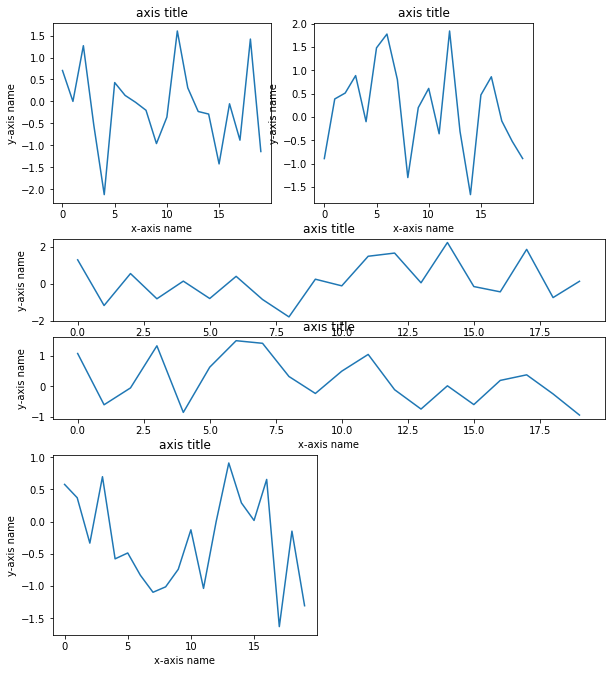

In [4]:
# List of subfigures  
class subfig:
    def __init__(self, widthInch, heightInch, ncols, nrows):
        self.width = widthInch     # inches
        self.height = heightInch   # inches 
        self.ncols = ncols
        self.nrows = nrows

# Style information 
fontsize = matplotlib.rcParams['font.size']
fontsizeIn = fontsize / 72 
fontPadding = 1.2 # 20% padding 

# List of sub figures 
subFigures = []
subFigures.append(subfig(widthInch=7, heightInch=3, ncols=2, nrows=1))
subFigures.append(subfig(widthInch=8, heightInch=3, ncols=1, nrows=2))
subFigures.append(subfig(widthInch=4, heightInch=3, ncols=1, nrows=1))

# Create the main figure to encompass all of the sub figures 
mainFigSize = dict(width=max([s.width for s in subFigures]), height=sum([s.height for s in subFigures]))
mainFigure = plt.figure(figsize=[mainFigSize['width'], mainFigSize['height']], constrained_layout=False)

# Create GrdiSpec for sub figures 
topEdgesInch = np.cumsum([s.height for s in subFigures[::-1]])[::-1]
bottomEdgesInch = topEdgesInch - np.array([s.height for s in subFigures])
bottomEdgesInch = bottomEdgesInch + 3 * fontsizeIn * fontPadding # Title, x-axis ticks, x-axis label with padding
rightEdgesInch = np.array([s.width for s in subFigures])
leftEdgesInch = np.array([0.0 for s in subFigures])
leftEdgesInch += 2 * fontsizeIn * fontPadding # y-axis ticks, y-axis label with padding

topEdges = topEdgesInch / mainFigSize['height']
bottomEdges = bottomEdgesInch / mainFigSize['height']
rightEdges = rightEdgesInch / mainFigSize['width']
leftEdges = leftEdgesInch / mainFigSize['width']

subFigGridSpecs = [gridspec.GridSpec(
        figure=mainFigure,
        ncols=subFigures[i].ncols, nrows=subFigures[i].nrows,
        top=topEdges[i], bottom=bottomEdges[i], 
        left=leftEdges[i], right=rightEdges[i]) 
    for i in range(len(subFigures))] 

# Add sub figure axes to the main figure 
allAxes = []
for i in range(len(subFigures)):
    axes = []
    for r in range(subFigures[i].nrows):
        for c in range(subFigures[i].ncols):
            axes.append(mainFigure.add_subplot(subFigGridSpecs[i][r, c]))
    allAxes.append(axes)

# Add plots 
for axes in allAxes:
    for ax in axes:
        ax.plot(np.random.normal(size=20))
        ax.set(xlabel='x-axis name', ylabel='y-axis name', title='axis title')
# plt.tight_layout()

# Attemp 3 
- using 2 layers of gridspec, first for sub figure and second for sub axes 

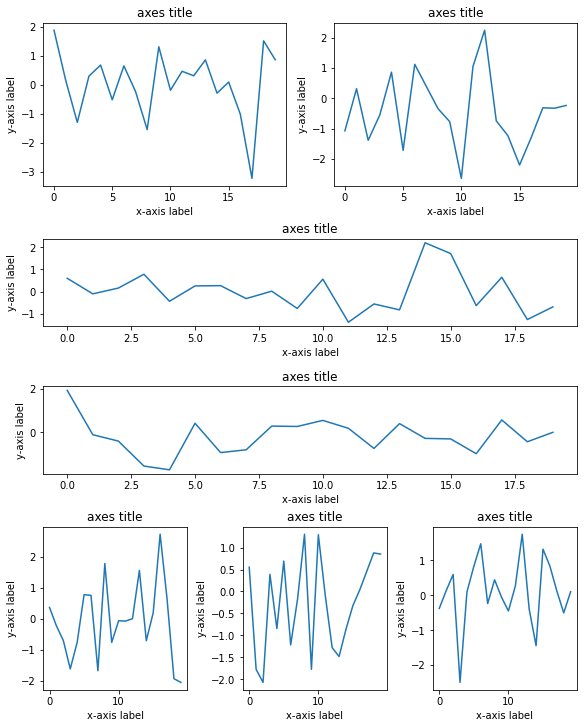

In [10]:
# List of sub-figures 
subFigSettings = []
subFigSettings.append(dict(width=7, height=3, ncols=2, nrows=1))
subFigSettings.append(dict(width=7, height=4, ncols=1, nrows=2))
subFigSettings.append(dict(width=8, height=3, ncols=3, nrows=1))

# Create Main Figure 
mainFigSize = dict(width = max([s['width'] for s in subFigSettings]), 
                   height = sum([s['height'] for s in subFigSettings]))
mainFigure = plt.figure(figsize=[mainFigSize['width'], mainFigSize['height']], constrained_layout=True)

# Create gridspec for sub-figures 
subFigGS = mainFigure.add_gridspec(nrows=len(subFigSettings), ncols=1, 
                                   height_ratios=[s['height'] for s in subFigSettings])
subFigGS = [subFigGS[i].subgridspec(nrows=subFigSettings[i]['nrows'], ncols=subFigSettings[i]['ncols'])
    for i in range(len(subFigSettings))]

# Get all aexs 
allAxes = []
for i in range(len(subFigGS)):
    axes = []
    for r in range(subFigSettings[i]['nrows']):
        for c in range(subFigSettings[i]['ncols']):
            axes.append(mainFigure.add_subplot(subFigGS[i][r,c]))
    allAxes.append(axes)

# Add plots 
for axes in allAxes:
    for ax in axes:
        ax.plot(np.random.normal(size=20))
        ax.set(xlabel='x-axis label', ylabel='y-axis label', title='axes title')

### Claasify

In [58]:
import pandas as pd 

class SubFigures:
    '''
    
    '''
    def __init__(self):
        self.subfigs = pd.DataFrame(columns = ['width', 'height', 'ncols', 'nrows'])
        
    def addSubfig(self, width, height, ncols, nrows):
        self.subfigs.loc[self.subfigs.shape[0], :] = [width, height, ncols, nrows]
        
    def finalize(self):
        subfigs = self.subfigs
        # Create the main figure 
        figsize = [subfigs.width.max(), subfigs.height.sum()]
        fig = plt.figure(figsize=figsize)
        # gridspec 
        gs = fig.add_gridspec(nrows=subfigs.shape[0], ncols=1, height_ratios=subfigs.height.values)
        gs = [gs[i].subgridspec(nrows=sf.nrows, ncols=sf.ncols) for i,sf in subfigs.iterrows()]
        # all axes 
        

In [59]:
figs = SubFigures()
figs.addSubfig(width=8, height=2.5, ncols=3, nrows=1)
figs.addSubfig(width=7, height=2, ncols=2, nrows=1)
print(figs.subfigs)
figs.finalize()

  width height ncols nrows
0     8    2.5     3     1
1     7      2     2     1


<Figure size 576x324 with 0 Axes>

In [ ]:
# List of sub-figures 
subFigSettings = []
subFigSettings.append(dict(width=7, height=3, ncols=2, nrows=1))
subFigSettings.append(dict(width=7, height=4, ncols=1, nrows=2))
subFigSettings.append(dict(width=8, height=3, ncols=3, nrows=1))

# Create Main Figure 
mainFigSize = dict(width = max([s['width'] for s in subFigSettings]), 
                   height = sum([s['height'] for s in subFigSettings]))
mainFigure = plt.figure(figsize=[mainFigSize['width'], mainFigSize['height']], constrained_layout=True)

# Create gridspec for sub-figures 
subFigGS = mainFigure.add_gridspec(nrows=len(subFigSettings), ncols=1, 
                                   height_ratios=[s['height'] for s in subFigSettings])
subFigGS = [subFigGS[i].subgridspec(nrows=subFigSettings[i]['nrows'], ncols=subFigSettings[i]['ncols'])
    for i in range(len(subFigSettings))]

# Get all aexs 
allAxes = []
for i in range(len(subFigGS)):
    axes = []
    for r in range(subFigSettings[i]['nrows']):
        for c in range(subFigSettings[i]['ncols']):
            axes.append(mainFigure.add_subplot(subFigGS[i][r,c]))
    allAxes.append(axes)

# Add plots 
for axes in allAxes:
    for ax in axes:
        ax.plot(np.random.normal(size=20))
        ax.set(xlabel='x-axis label', ylabel='y-axis label', title='axes title')